In [54]:
import numpy as  np
import torch
from torch.utils.data import Dataset, DataLoader,ConcatDataset
import glob #helps to read data from different directories
import matplotlib.pyplot as plt 
import sys
from sklearn.metrics import confusion_matrix,accuracy_score
import cv2 #computer vision helps to read image data
import torch.nn as nn
import torch.nn.functional as f
from sklearn.model_selection import train_test_split


In [55]:
#Reading the images-Brain_Tumor dataset
tumor=[]
path_img_yes='./brain_tumor_dataset/yes/*.jpg'
for i in glob.iglob(path_img_yes):
    img=cv2.imread(i)
    img=cv2.resize(img,(128,128))#to convert the image in same size
    b ,g ,r = cv2.split(img)#This is to split the channels and store it so that we can rearrange it correct multi channel order
    cv2.merge([r,g,b])#It reassambles it into correct order
    tumor.append(img)
#this time non-tumor dataset
healthy=[]
path_img_no='./brain_tumor_dataset/no/*.jpg'
for i in glob.iglob(path_img_no):
    img=cv2.imread(i)
    img=cv2.resize(img,(128,128))#to convert the image in same size
    b ,g ,r = cv2.split(img)#This is to split the channels and store it so that we can rearrange it correct multi channel order
    cv2.merge([r,g,b])#It reassambles it into correct order
    healthy.append(img)


In [56]:
for img in tumor:
    print(img.shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [57]:
for img in healthy:
    print(img.shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [58]:
#converting everything into numpy array
healthy=np.array(healthy)
tumor=np.array(tumor)
healthy.shape
healthy.shape
All_df=np.concatenate((healthy,tumor))
print(All_df.shape)

(245, 128, 128, 3)


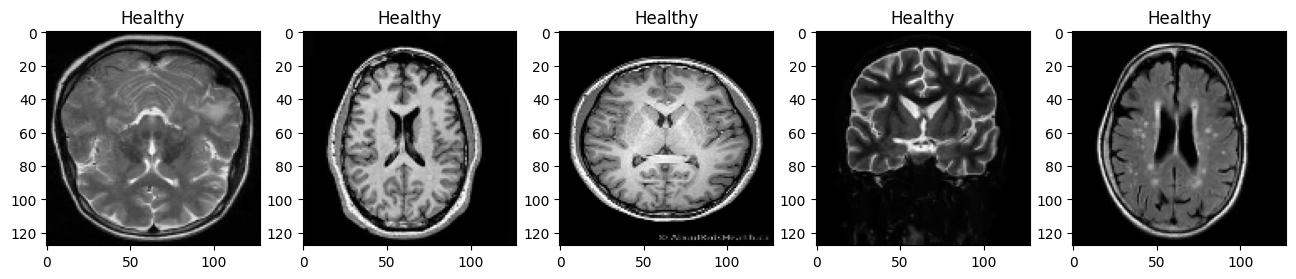

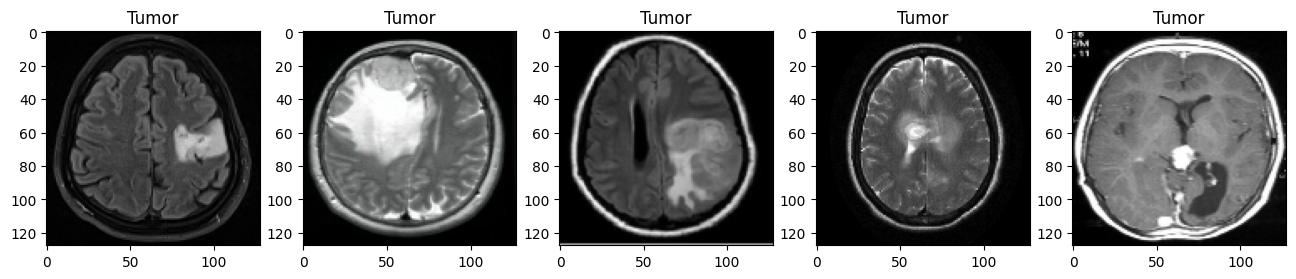

In [59]:
np.random.choice(5,3,replace=False)#it chooses 3 random numbers lesser than 5 and the no. will not be repeated
#visualizing
def plt_random(healthy,tumor,num):
    healthy_im=healthy[np.random.choice(healthy.shape[0],num,replace=False)]
    tumor_im=tumor[np.random.choice(tumor.shape[0],num,replace=False)]
    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1,num,i+1)
        plt.title("Healthy")
        plt.imshow(healthy_im[i])
    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1,num,i+1)
        plt.title("Tumor")
        plt.imshow(tumor_im[i])
plt_random(healthy,tumor,5)


In [60]:
#Now its time to create custom dataset class of pytorch
class MRI(Dataset):
    def __init__(self):
        
        
        tumor=[]
        path_img_yes='./brain_tumor_dataset/yes/*.jpg'
        for i in glob.iglob(path_img_yes):
            img=cv2.imread(i)
            img=cv2.resize(img,(128,128))#to convert the image in same size
            b ,g ,r = cv2.split(img)#This is to split the channels and store it so that we can rearrange it correct multi channel order
            cv2.merge([r,g,b])#It reassambles it into correct order
            img=img.reshape((img.shape[2],img.shape[0],img.shape[1]))#To get out of (h,w , #channel)
            tumor.append(img)
    
        healthy=[]
        path_img_no='./brain_tumor_dataset/no/*.jpg'
        for i in glob.iglob(path_img_no):
            img=cv2.imread(i)
            img=cv2.resize(img,(128,128))#to convert the image in same size
            b ,g ,r = cv2.split(img)#This is to split the channels and store it so that we can rearrange it correct multi channel order
            cv2.merge([r,g,b])#It reassambles it into correct order
            img=img.reshape((img.shape[2],img.shape[0],img.shape[1]))#To get out of (h,w , #channel)
            healthy.append(img)
        
        healthy=np.array(healthy,dtype=np.float32)
        tumor=np.array(tumor,dtype=np.float32)
        
        tumor_label=np.ones(tumor.shape[0],dtype=np.float32)
        healthy_label=np.zeros(healthy.shape[0],dtype=np.float32)
        
        
        
        self.images=np.concatenate((tumor,healthy),axis=0)
        self.labels=np.concatenate((tumor_label,healthy_label))
    def __len__(self):
        return self.images.shape[0]
  
    def __getitem__(self, index):
        sample = {'image':self.images[index],'label':self.labels[index]}
        return sample
    def normalize(self):
        # Normalize the image
        self.images = self.images/ 255.0


In [101]:
#Now its time to create custom dataset class of pytorch
class MRI(Dataset):
    def __init__(self):
        self.x_train,self.y_train,self.x_val,self.y_val = None, None, None,None
        
        self.mode='train'
        
        tumor=[]
        path_img_yes='./brain_tumor_dataset/yes/*.jpg'
        for i in glob.iglob(path_img_yes):
            img=cv2.imread(i)
            img=cv2.resize(img,(128,128))#to convert the image in same size
            b ,g ,r = cv2.split(img)#This is to split the channels and store it so that we can rearrange it correct multi channel order
            cv2.merge([r,g,b])#It reassambles it into correct order
            img=img.reshape((img.shape[2],img.shape[0],img.shape[1]))#To get out of (h,w , #channel)
            tumor.append(img)
    
        healthy=[]
        path_img_no='./brain_tumor_dataset/no/*.jpg'
        for i in glob.iglob(path_img_no):
            img=cv2.imread(i)
            img=cv2.resize(img,(128,128))#to convert the image in same size
            b ,g ,r = cv2.split(img)#This is to split the channels and store it so that we can rearrange it correct multi channel order
            cv2.merge([r,g,b])#It reassambles it into correct order
            img=img.reshape((img.shape[2],img.shape[0],img.shape[1]))#To get out of (h,w , #channel)
            healthy.append(img)
        
        healthy=np.array(healthy,dtype=np.float32)
        tumor=np.array(tumor,dtype=np.float32)
        
        tumor_label=np.ones(tumor.shape[0],dtype=np.float32)
        healthy_label=np.zeros(healthy.shape[0],dtype=np.float32)
        
        
        
        self.images=np.concatenate((tumor,healthy),axis=0)
        self.labels=np.concatenate((tumor_label,healthy_label))
        
    def train_val_split(self):
        self.x_train,self.x_val,self.y_train,self.y_val= train_test_split(self.image,self.label,test_size=0.20,random_state=42)
        
    def __len__(self):
        if self.mode =='train':
            return self.x_train.shape[0]
        elif self.mode =='val':
            return self.x_val.shape[0]
  
    def __getitem__(self, index):
        if self.mode =='train':
            sample={'image':self.x_train[index],'label':self.y_train[index]}
        elif self.mode =='val':
            sample={'image': self.x_val[index],'label':self.y_val[index]}
        return sample
        # sample = {'image':self.images[index],'label':self.labels[index]}
        return sample
    def normalize(self):
        # Normalize the image
        self.images = self.images/ 255.0


In [61]:
mri=MRI()
mri.normalize()
img=mri[5]['image']
img.shape

(3, 128, 128)

In [62]:
dataloader=DataLoader(mri,batch_size=10,shuffle=True)#To create a batch of 10 random images
for sample in dataloader:
    img = sample['image']
    print(img.shape)
    # img=img.reshape(img.shape[1],img.shape[2],img.shape[0])
    # plt.imshow(img)
    # plt.show()

torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([10, 3, 128, 128])
torch.Size([5, 3, 128, 128])


In [63]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=5),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(in_features=256, out_features=120),
            nn.Tanh(),
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=1)
        )

    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)  # Flattens the 2D Arrays
        x = self.fc_model(x)
        x = torch.sigmoid(x)  

        return x


In [64]:
# Evaluate a just created nn before training
mri_dataset=MRI()
mri_dataset.normalize()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=CNN().to(device)

dataloader=DataLoader(mri_dataset,batch_size=32,shuffle=False)
model.eval()
outputs=[]
y_true=[]

with torch.no_grad():
    for D in dataloader:
        image=D['image'].to(device)
        label=D['label'].to(device)
        
        y_hat=model(image)
        
        outputs.append(y_hat.cpu().detach().numpy())
        y_true.append(label.cpu().detach().numpy())


In [65]:
outputs=np.concatenate(outputs,axis=0).squeeze()
y_true=np.concatenate(y_true,axis=0).squeeze()

In [66]:
outputs.shape

(245,)

In [69]:
def threshold(scores,threshold=.5,minimum=0,maximum=1.0):
    x=np.array(list(scores))
    x[x>=threshold] = maximum
    x[x<=threshold] = minimum
    return x

In [112]:
# Function to preprocess real brain images
def preprocess_real_images(image_paths):
    images = []
    for path in image_paths:
        img = cv2.imread(path)
        img = cv2.resize(img, (128, 128))
        b, g, r = cv2.split(img)
        cv2.merge([r, g, b])
        img = img.reshape((img.shape[2], img.shape[0], img.shape[1]))
        images.append(img)
    return np.array(images, dtype=np.float32) / 255.0



In [113]:
# Save the trained model
torch.save(model.state_dict(), 'trained_model.pth')

# Load the saved model
model = CNN()
model.load_state_dict(torch.load('trained_model.pth'))
model.eval()

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [120]:
# Test with real brain images
real_image_paths = ['C:\\Users\\Sayan Maity\\OneDrive\\Desktop\\Brain_Hemarage_detection_model\\8 no.jpg', 'C:\\Users\\Sayan Maity\\OneDrive\\Desktop\\Brain_Hemarage_detection_model\\Y2.jpg']
real_images = []

for path in real_image_paths:
    img = cv2.imread(path)
    img = cv2.resize(img, (128, 128))
    b, g, r = cv2.split(img)
    cv2.merge([r, g, b])
    img = img.reshape((img.shape[2], img.shape[0], img.shape[1]))
    real_images.append(img)

real_images = np.array(real_images, dtype=np.float32) / 255.0

# Create an instance of the MRI class for real images
real_dataset = MRI()
real_dataset.images = real_images
real_dataset.normalize()

# Set the mode to 'val' for evaluation
real_dataset.mode = 'val'

# Create a DataLoader for real images
real_dataloader = DataLoader(real_dataset, batch_size=32, shuffle=False)

# Evaluate the model on real images
real_outputs = []
with torch.no_grad():
    for D in real_dataloader:
        real_images = D['image'].to(device)
        real_y_hat = model(real_images)
        real_outputs.append(real_y_hat.cpu().detach().numpy())

real_outputs = np.concatenate(real_outputs, axis=0).squeeze()
real_predictions = threshold(real_outputs)

# Print or use real_predictions as needed
print("Predictions on real brain images:", real_predictions)


AttributeError: 'NoneType' object has no attribute 'shape'

In [75]:
accuracy_score(y_true,threshold(outputs))

0.6285714285714286

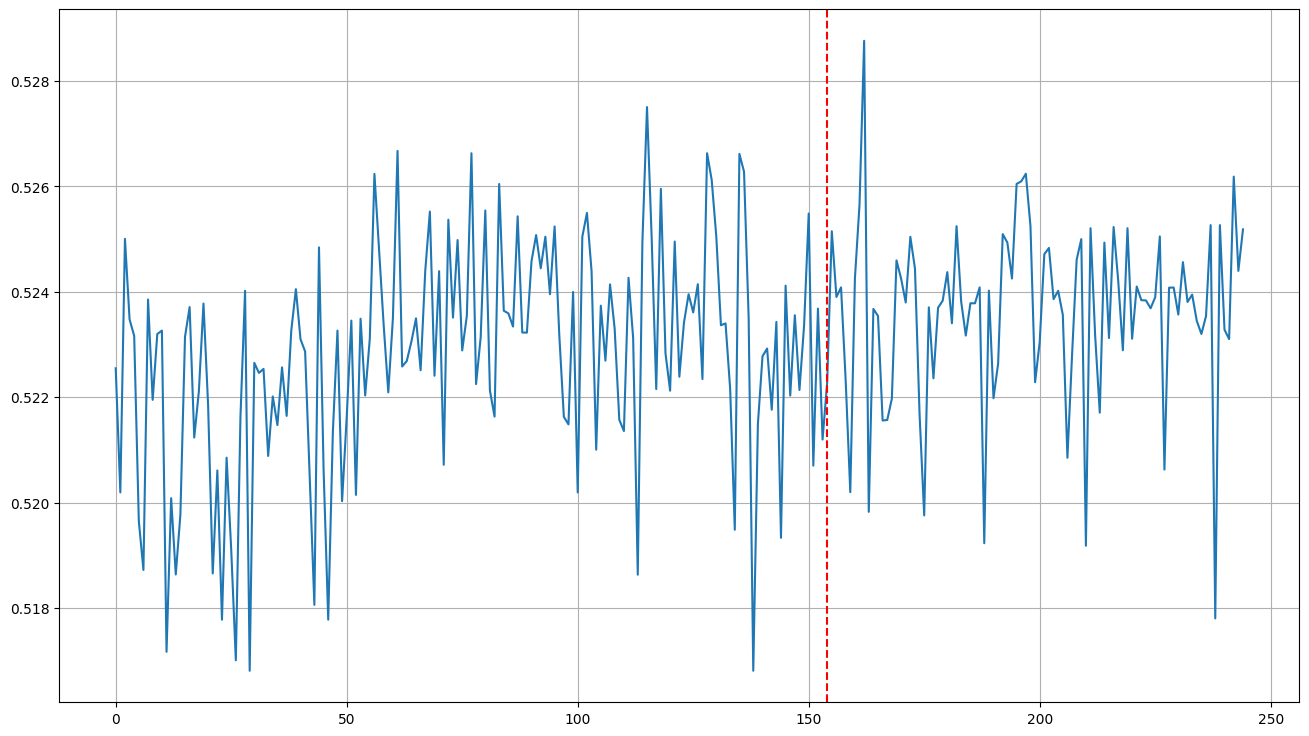

In [76]:
plt.figure(figsize=(16,9))
plt.plot(outputs)
plt.axvline(x=len(tumor),color='r',linestyle='--')
plt.grid()

In [86]:
# Train the model 
eta=0.0001
EPOCH = 400
optimizer = torch.optim.Adam(model.parameters(),lr=eta)
dataloader=DataLoader(mri_dataset,batch_size=32,shuffle=True)
model.train()

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [91]:
for epoch in range(1,EPOCH):
    losses=[]
    for D in dataloader:
        optimizer.zero_grad()
        data = D['image'].to(device)
        label = D['label'].to(device)
        y_hat = model(data)
        # print(y_hat.squeeze().shape)
        # print(label.shape)
        #time for defining loss function - Sayan
        error=nn.BCELoss()
        loss=torch.sum(error(y_hat.squeeze(),label))
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        
    if (epoch+1)%10 == 0:
        print(f"Trained epoch no. {epoch+1} and mean_losses {np.mean(losses)}")   

Trained epoch no. 10 and mean_losses 5.865807736427087e-06
Trained epoch no. 20 and mean_losses 5.461445169885337e-06
Trained epoch no. 30 and mean_losses 5.2303487905192014e-06
Trained epoch no. 40 and mean_losses 4.974892533482489e-06
Trained epoch no. 50 and mean_losses 4.844613556542754e-06
Trained epoch no. 60 and mean_losses 4.6095801451429e-06
Trained epoch no. 70 and mean_losses 4.401205984549961e-06
Trained epoch no. 80 and mean_losses 4.279887235725255e-06
Trained epoch no. 90 and mean_losses 4.186900639524538e-06
Trained epoch no. 100 and mean_losses 3.9405803988756816e-06
Trained epoch no. 110 and mean_losses 3.7835252442164347e-06
Trained epoch no. 120 and mean_losses 3.59386660875316e-06
Trained epoch no. 130 and mean_losses 3.485925077484353e-06
Trained epoch no. 140 and mean_losses 3.359247301659707e-06
Trained epoch no. 150 and mean_losses 3.1947535603649158e-06
Trained epoch no. 160 and mean_losses 3.0616766082403046e-06
Trained epoch no. 170 and mean_losses 2.9333744

In [93]:
#Evaluate the trained model
model.eval()
dataloader = DataLoader(mri_dataset,batch_size=32,shuffle=False)
outputs=[]
y_true=[]
with torch.no_grad():
    for D in dataloader:
        image=D['image'].to(device)
        label=D['label'].to(device)
        
        y_hat=model(image)
        
        outputs.append(y_hat.cpu().detach().numpy())
        y_true.append(label.cpu().detach().numpy())
outputs=np.concatenate(outputs,axis=0).squeeze()
y_true=np.concatenate(y_true,axis=0).squeeze()
accuracy_score(y_true,threshold(outputs))

1.0

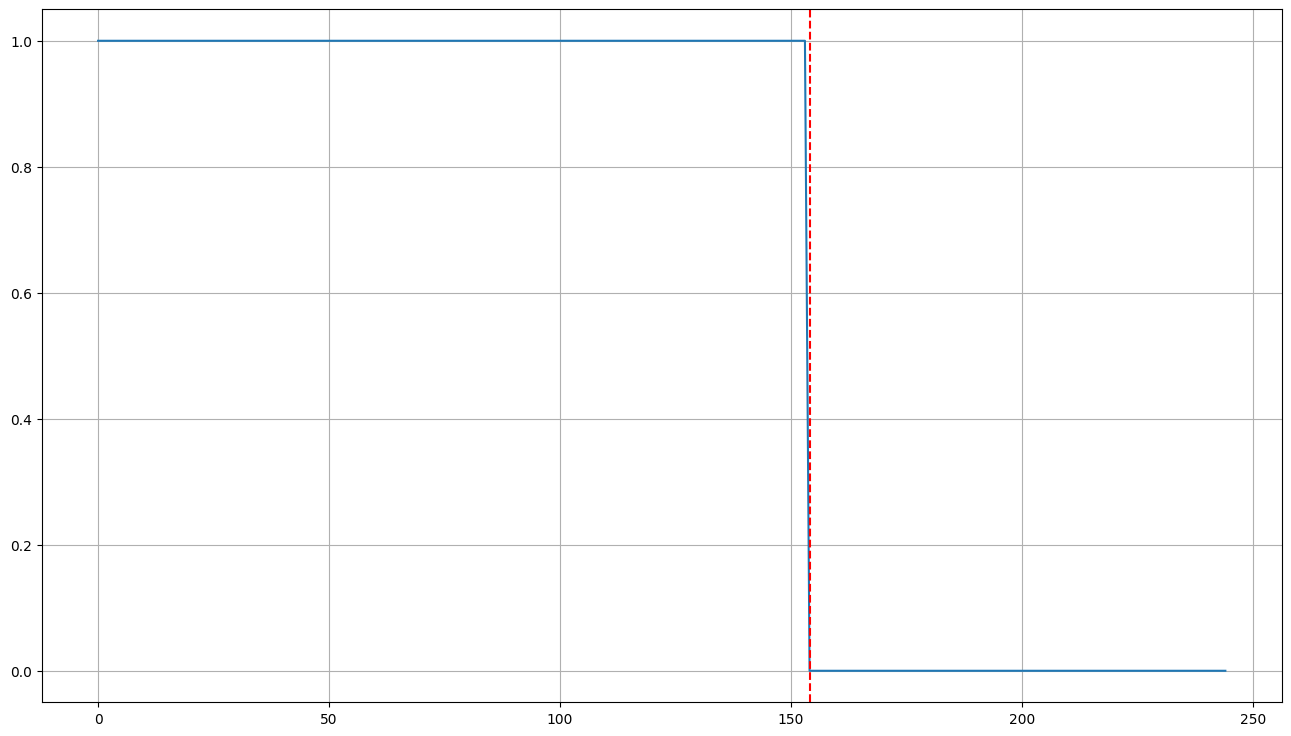

In [94]:
plt.figure(figsize=(16,9))
plt.plot(outputs)
plt.axvline(x=len(tumor),color='r',linestyle='--')
plt.grid()

In [106]:
#Now its time to create custom dataset class of pytorch
class MRI(Dataset):
    def __init__(self):
        self.x_train,self.y_train,self.x_val,self.y_val = None, None, None,None
        
        self.mode='train'
        
        tumor=[]
        path_img_yes='./brain_tumor_dataset/yes/*.jpg'
        for i in glob.iglob(path_img_yes):
            img=cv2.imread(i)
            img=cv2.resize(img,(128,128))#to convert the image in same size
            b ,g ,r = cv2.split(img)#This is to split the channels and store it so that we can rearrange it correct multi channel order
            cv2.merge([r,g,b])#It reassambles it into correct order
            img=img.reshape((img.shape[2],img.shape[0],img.shape[1]))#To get out of (h,w , #channel)
            tumor.append(img)
    
        healthy=[]
        path_img_no='./brain_tumor_dataset/no/*.jpg'
        for i in glob.iglob(path_img_no):
            img=cv2.imread(i)
            img=cv2.resize(img,(128,128))#to convert the image in same size
            b ,g ,r = cv2.split(img)#This is to split the channels and store it so that we can rearrange it correct multi channel order
            cv2.merge([r,g,b])#It reassambles it into correct order
            img=img.reshape((img.shape[2],img.shape[0],img.shape[1]))#To get out of (h,w , #channel)
            healthy.append(img)
        
        healthy=np.array(healthy,dtype=np.float32)
        tumor=np.array(tumor,dtype=np.float32)
        
        tumor_label=np.ones(tumor.shape[0],dtype=np.float32)
        healthy_label=np.zeros(healthy.shape[0],dtype=np.float32)
        
        
        
        self.images=np.concatenate((tumor,healthy),axis=0)
        self.labels=np.concatenate((tumor_label,healthy_label))
        
    def train_val_split(self):
        self.x_train,self.x_val,self.y_train,self.y_val= train_test_split(self.image,self.label,test_size=0.20,random_state=42)
        
    def __len__(self):
        if self.mode =='train':
            return self.x_train.shape[0]
        elif self.mode =='val':
            return self.x_val.shape[0]
  
    def __getitem__(self, index):
        if self.mode =='train':
            sample={'image':self.x_train[idx],'label':self.y_train[idx]}
        elif self.mode =='val':
            sample={'image': self.x_val[idx],'label':self.y_val[idx]}
        return sample
        # sample = {'image':self.images[index],'label':self.labels[index]}
        return sample
    def normalize(self):
        # Normalize the image
        self.images = self.images/ 255.0


In [109]:
# Inspecting overfitting
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import glob

class MRI(Dataset):
    def __init__(self):
        self.x_train, self.y_train, self.x_val, self.y_val = None, None, None, None
        self.mode = 'train'
        
        tumor=[]
        path_img_yes='./brain_tumor_dataset/yes/*.jpg'
        for i in glob.iglob(path_img_yes):
            img=cv2.imread(i)
            img=cv2.resize(img,(128,128))#to convert the image in same size
            b ,g ,r = cv2.split(img)#This is to split the channels and store it so that we can rearrange it correct multi channel order
            cv2.merge([r,g,b])#It reassambles it into correct order
            img=img.reshape((img.shape[2],img.shape[0],img.shape[1]))#To get out of (h,w , #channel)
            tumor.append(img)
    
        healthy=[]
        path_img_no='./brain_tumor_dataset/no/*.jpg'
        for i in glob.iglob(path_img_no):
            img=cv2.imread(i)
            img=cv2.resize(img,(128,128))#to convert the image in same size
            b ,g ,r = cv2.split(img)#This is to split the channels and store it so that we can rearrange it correct multi channel order
            cv2.merge([r,g,b])#It reassambles it into correct order
            img=img.reshape((img.shape[2],img.shape[0],img.shape[1]))#To get out of (h,w , #channel)
            healthy.append(img)
        
        healthy=np.array(healthy,dtype=np.float32)
        tumor=np.array(tumor,dtype=np.float32)
        
        tumor_label=np.ones(tumor.shape[0],dtype=np.float32)
        healthy_label=np.zeros(healthy.shape[0],dtype=np.float32)
        
        
        
        self.images=np.concatenate((tumor,healthy),axis=0)
        self.labels=np.concatenate((tumor_label,healthy_label))

    def train_val_split(self):
        self.x_train, self.x_val, self.y_train, self.y_val = train_test_split(
            self.images, self.labels, test_size=0.20, random_state=42
        )

    def __len__(self):
        if self.mode == 'train':
            return self.x_train.shape[0]
        elif self.mode == 'val':
            return self.x_val.shape[0]

    def __getitem__(self, index):
        if self.mode == 'train':
            sample = {'image': self.x_train[index], 'label': self.y_train[index]}
        elif self.mode == 'val':
            sample = {'image': self.x_val[index], 'label': self.y_val[index]}
        return sample

    def normalize(self):
        # Normalize the image
        self.images = self.images / 255.0

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=5),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(in_features=256, out_features=120),
            nn.Tanh(),
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=1)
        )

    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)  # Flattens the 2D Arrays
        x = torch.sigmoid(self.fc_model(x))  # Use torch.sigmoid here
        return x

# Usage
mri_dataset = MRI()
mri_dataset.normalize()
mri_dataset.train_val_split()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)

train_dataloader = DataLoader(mri_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(mri_dataset, batch_size=32, shuffle=True)

eta = 0.0001
optimizer = torch.optim.Adam(model.parameters(), lr=eta)
epoch_train_loss = []
epoch_val_loss = []

for epoch in range(1, 60):
    train_losses = []
    model.train()
    mri_dataset.mode = 'train'
    optimizer.zero_grad()

    for D in train_dataloader:
        data = D['image'].to(device)
        label = D['label'].to(device)
        y_hat = model(data)
        error = nn.BCELoss()
        loss = error(y_hat.squeeze(), label)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

    epoch_train_loss.append(np.mean(train_losses))

    val_losses = []
    model.eval()
    mri_dataset.mode = 'val'

    with torch.no_grad():
        for D in val_dataloader:
            data = D['image'].to(device)
            label = D['label'].to(device)
            y_hat = model(data)
            error = nn.BCELoss()
            loss = error(y_hat.squeeze(), label)
            val_losses.append(loss.item())

    epoch_val_loss.append(np.mean(val_losses))
    if (epoch+1) % 10 == 0:
        print(f"train loss {np.mean(train_losses)} and mean loss{np.mean(val_losses)}")


train loss 0.6124091914721898 and mean loss0.6340931057929993
train loss 0.5541232398578099 and mean loss0.5863989293575287
train loss 0.5135399912084851 and mean loss0.6162271201610565
train loss 0.45742203508104595 and mean loss0.6179490983486176
train loss 0.4344337454863957 and mean loss0.6725471317768097
train loss 0.4121228115899222 and mean loss0.7174520194530487


Text(0, 0.5, 'Loss')

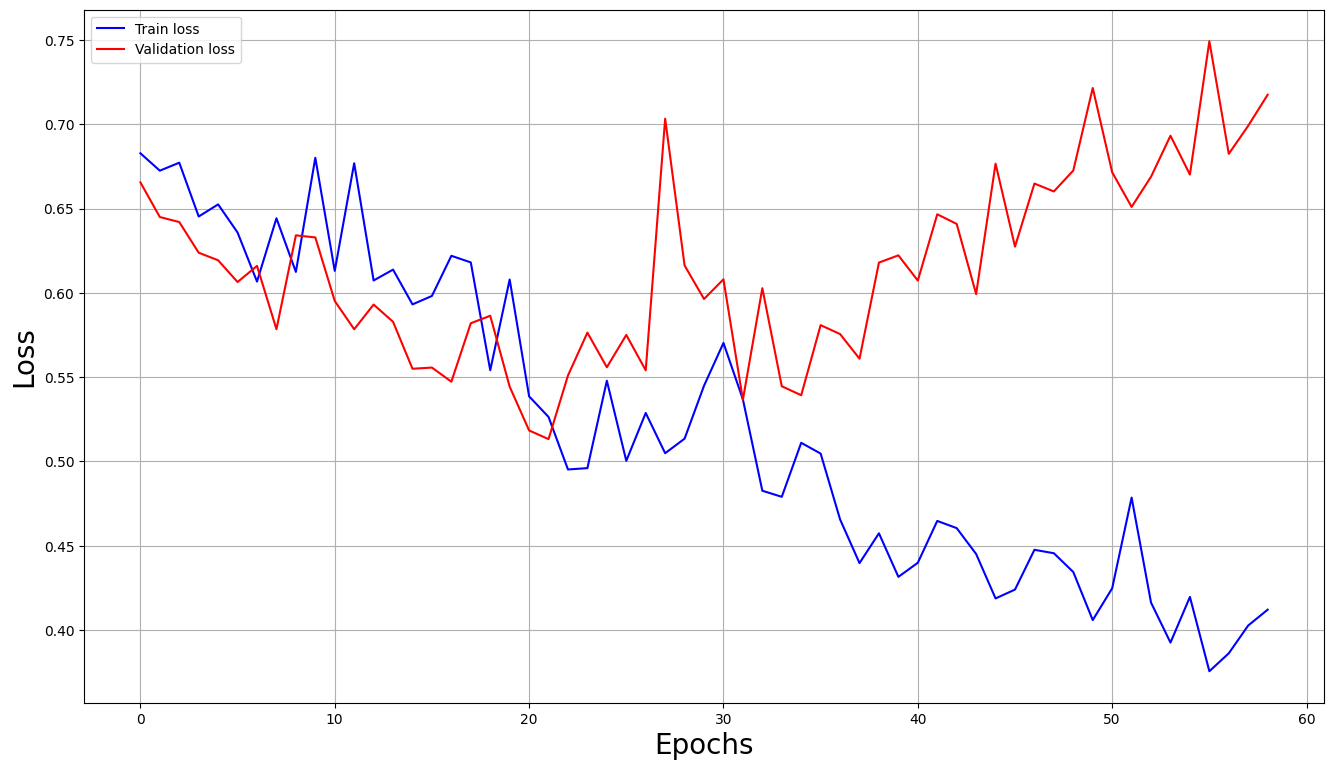

In [111]:
plt.figure(figsize=(16,9))
plt.plot(epoch_train_loss,c='b',label='Train loss')
plt.plot(epoch_val_loss,c='r',label='Validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss',fontsize=20)


Final

In [134]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import glob
import matplotlib.pyplot as plt
import cv2
import torch.nn as nn
from sklearn.model_selection import train_test_split

# Define the custom dataset class
class MRIDataset(Dataset):
    def __init__(self, mode='train'):
        self.mode = mode
        self.images, self.labels = self.load_data()
        self.train_val_split()

    def load_data(self):
        tumor = []
        path_img_yes = './brain_tumor_dataset/yes/*.jpg'
        for i in glob.iglob(path_img_yes):
            img = cv2.imread(i)
            img = self.preprocess_image(img)
            tumor.append(img)

        healthy = []
        path_img_no = './brain_tumor_dataset/no/*.jpg'
        for i in glob.iglob(path_img_no):
            img = cv2.imread(i)
            img = self.preprocess_image(img)
            healthy.append(img)

        healthy = np.array(healthy, dtype=np.float32)
        tumor = np.array(tumor, dtype=np.float32)

        tumor_label = np.ones(tumor.shape[0], dtype=np.float32)
        healthy_label = np.zeros(healthy.shape[0], dtype=np.float32)

        images = np.concatenate((tumor, healthy), axis=0)
        labels = np.concatenate((tumor_label, healthy_label))

        return images, labels

    def preprocess_image(self, img):
        img = cv2.resize(img, (128, 128))
        b, g, r = cv2.split(img)
        img = cv2.merge([r, g, b])
        img = img.reshape((img.shape[2], img.shape[0], img.shape[1]))
        return img / 255.0

    def train_val_split(self):
        self.x_train, self.x_val, self.y_train, self.y_val = train_test_split(
            self.images, self.labels, test_size=0.20, random_state=42
        )

    def __len__(self):
        if self.mode == 'train':
            return self.x_train.shape[0]
        elif self.mode == 'val':
            return self.x_val.shape[0]

    def __getitem__(self, index):
        if self.mode == 'train':
            sample = {'image': self.x_train[index], 'label': self.y_train[index]}
        elif self.mode == 'val':
            sample = {'image': self.x_val[index], 'label': self.y_val[index]}
        return sample

    def normalize(self):
        self.images = self.images / 255.0

# Define the CNN model with Batch Normalization and Dropout
class ImprovedCNN(nn.Module):
    def __init__(self):
        super(ImprovedCNN, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(in_features=64*30*30, out_features=512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(in_features=512, out_features=1)
        )

    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = torch.sigmoid(self.fc_model(x))
        return x

# Function to threshold predicted scores
def threshold(scores, threshold=0.5, minimum=0, maximum=1.0):
    scores = np.array(scores)
    scores[scores >= threshold] = maximum
    scores[scores < threshold] = minimum
    return scores

# Training and Evaluation
# Training and Evaluation with Learning Rate Scheduler and Early Stopping
def train_and_evaluate_improved(model, train_dataloader, val_dataloader, epochs=60, learning_rate=0.0001, patience=5):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
    criterion = nn.BCELoss()

    best_val_loss = float('inf')
    patience_counter = 0

    epoch_train_loss = []
    epoch_val_loss = []

    for epoch in range(1, epochs):
        train_losses = []
        model.train()

        for batch in train_dataloader:
            images = batch['image'].to(device)
            labels = batch['label'].to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs.squeeze(), labels)
            loss.backward()
            optimizer.step()

            train_losses.append(loss.item())

        epoch_train_loss.append(np.mean(train_losses))

        val_losses = []
        model.eval()

        with torch.no_grad():
            for batch in val_dataloader:
                images = batch['image'].to(device)
                labels = batch['label'].to(device)

                outputs = model(images)
                loss = criterion(outputs.squeeze(), labels)
                val_losses.append(loss.item())

        epoch_val_loss.append(np.mean(val_losses))

        scheduler.step()

        if np.mean(val_losses) < best_val_loss:
            best_val_loss = np.mean(val_losses)
            patience_counter = 0
        else:
            patience_counter += 1

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1} - Train Loss: {np.mean(train_losses)}, Val Loss: {np.mean(val_losses)}")

        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}.")
            break

    return model, epoch_train_loss, epoch_val_loss
# Preprocess and evaluate real brain images
def preprocess_and_evaluate_real_images(model, real_image_paths):
    real_images = preprocess_real_images(real_image_paths)
    real_dataset = MRIDataset(mode='val')
    real_dataset.images = real_images
    real_dataset.normalize()

    real_dataloader = DataLoader(real_dataset, batch_size=32, shuffle=False)

    model.eval()
    outputs = []

    with torch.no_grad():
        for batch in real_dataloader:
            images = batch['image'].to(device)
            predictions = model(images)
            outputs.append(predictions.cpu().detach().numpy())

    outputs = np.concatenate(outputs, axis=0).squeeze()
    predictions = threshold(outputs)

    return predictions

# Function to preprocess real brain images
def preprocess_real_images(image_paths):
    images = []
    for path in image_paths:
        img = cv2.imread(path)
        if img is not None:
            img = cv2.resize(img, (128, 128))
            img = cv2.merge([img[:, :, 2], img[:, :, 1], img[:, :, 0]])
            img = img.reshape((img.shape[2], img.shape[0], img.shape[1]))
            images.append(img)
        else:
            print(f"Error reading image at path: {path}")

    return np.array(images, dtype=np.float32) / 255.0


# ... (previous code)

# Example Usage
if __name__ == "__main__":
    # Create and train the improved model
    improved_cnn_model = ImprovedCNN()
    trained_model, train_losses, val_losses = train_and_evaluate_improved(improved_cnn_model, train_dataloader, val_dataloader)

    # Save the trained model
    torch.save(trained_model.state_dict(), 'improved_model.pth')

# Load the trained improved model
loaded_improved_model = ImprovedCNN()
loaded_improved_model.load_state_dict(torch.load('improved_model.pth'))
loaded_improved_model.eval()

# Evaluate on real brain images
real_image_paths = [r'C:\Users\Sayan Maity\OneDrive\Desktop\Brain_Hemarage_detection_model\8 no.jpg']
real_predictions = preprocess_and_evaluate_real_images(loaded_improved_model, real_image_paths)

print("Predictions on real brain images:", real_predictions)

if np.any(real_predictions == 1):
    print("Brain Hemorrhage")
else:
    print("Normal")

Epoch 10 - Train Loss: 0.3117651066609791, Val Loss: 0.9270094633102417
Epoch 20 - Train Loss: 0.08837145806423255, Val Loss: 0.05533997927393232
Epoch 30 - Train Loss: 0.08516168115394455, Val Loss: 0.04551615033830915
Early stopping at epoch 35.
Predictions on real brain images: [1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0.
 0.]
Brain Hemorrhage


In [4]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import glob
import cv2
import torch.nn as nn
from sklearn.model_selection import train_test_split

# Define the custom dataset class
class MRIDataset(Dataset):
    def __init__(self, mode='train'):
        self.mode = mode
        self.images, self.labels = self.load_data()
        self.train_val_split()

    def load_data(self):
        tumor = []
        path_img_yes = './brain_tumor_dataset/yes/*.jpg'
        for i in glob.iglob(path_img_yes):
            img = cv2.imread(i)
            img = self.preprocess_image(img)
            tumor.append(img)

        healthy = []
        path_img_no = './brain_tumor_dataset/no/*.jpg'
        for i in glob.iglob(path_img_no):
            img = cv2.imread(i)
            img = self.preprocess_image(img)
            healthy.append(img)

        healthy = np.array(healthy, dtype=np.float32)
        tumor = np.array(tumor, dtype=np.float32)

        tumor_label = np.ones(tumor.shape[0], dtype=np.float32)
        healthy_label = np.zeros(healthy.shape[0], dtype=np.float32)

        images = np.concatenate((tumor, healthy), axis=0)
        labels = np.concatenate((tumor_label, healthy_label))

        return images, labels

    def preprocess_image(self, img):
        img = cv2.resize(img, (128, 128))
        b, g, r = cv2.split(img)
        img = cv2.merge([r, g, b])
        img = img.reshape((img.shape[2], img.shape[0], img.shape[1]))
        return img / 255.0

    def train_val_split(self):
        self.x_train, self.x_val, self.y_train, self.y_val = train_test_split(
            self.images, self.labels, test_size=0.20, random_state=42
        )

    def __len__(self):
        if self.mode == 'train':
            return self.x_train.shape[0]
        elif self.mode == 'val':
            return self.x_val.shape[0]

    def __getitem__(self, index):
        if self.mode == 'train':
            sample = {'image': self.x_train[index], 'label': self.y_train[index]}
        elif self.mode == 'val':
            sample = {'image': self.x_val[index], 'label': self.y_val[index]}
        return sample

    def normalize(self):
        self.images = self.images / 255.0

# Define the CNN model with Batch Normalization and Dropout
class ImprovedCNN(nn.Module):
    def __init__(self):
        super(ImprovedCNN, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(in_features=64*30*30, out_features=512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(in_features=512, out_features=1)
        )

    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = torch.sigmoid(self.fc_model(x))
        return x

# Function to threshold predicted scores
def threshold(scores, threshold=0.5, minimum=0, maximum=1.0):
    scores = np.array(scores)
    scores[scores >= threshold] = maximum
    scores[scores < threshold] = minimum
    return scores

# Training and Evaluation
# Training and Evaluation with Learning Rate Scheduler and Early Stopping
def train_and_evaluate_improved(model, train_dataloader, val_dataloader, epochs=60, learning_rate=0.0001, patience=5):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
    criterion = nn.BCELoss()

    best_val_loss = float('inf')
    patience_counter = 0

    epoch_train_loss = []
    epoch_val_loss = []

    for epoch in range(1, epochs):
        train_losses = []
        model.train()

        for batch in train_dataloader:
            images = batch['image'].to(device)
            labels = batch['label'].to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs.squeeze(), labels)
            loss.backward()
            optimizer.step()

            train_losses.append(loss.item())

        epoch_train_loss.append(np.mean(train_losses))

        val_losses = []
        model.eval()

        with torch.no_grad():
            for batch in val_dataloader:
                images = batch['image'].to(device)
                labels = batch['label'].to(device)

                outputs = model(images)
                loss = criterion(outputs.squeeze(), labels)
                val_losses.append(loss.item())

        epoch_val_loss.append(np.mean(val_losses))

        scheduler.step()

        if np.mean(val_losses) < best_val_loss:
            best_val_loss = np.mean(val_losses)
            patience_counter = 0
        else:
            patience_counter += 1

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1} - Train Loss: {np.mean(train_losses)}, Val Loss: {np.mean(val_losses)}")

        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}.")
            break

    return model, epoch_train_loss, epoch_val_loss

# Preprocess and evaluate real brain images
def preprocess_and_evaluate_real_images(model, real_image_paths):
    real_images = preprocess_real_images(real_image_paths)
    real_dataset = MRIDataset(mode='val')
    real_dataset.images = real_images
    real_dataset.normalize()

    real_dataloader = DataLoader(real_dataset, batch_size=32, shuffle=False)

    model.eval()
    outputs = []

    with torch.no_grad():
        for batch in real_dataloader:
            images = batch['image'].to(device)
            predictions = model(images)
            outputs.append(predictions.cpu().detach().numpy())

    outputs = np.concatenate(outputs, axis=0).squeeze()
    # Choose the prediction with the maximum confidence
    most_accurate_prediction = int(np.round(np.mean(outputs)))

    return most_accurate_prediction

# Function to preprocess real brain images
def preprocess_real_images(image_paths):
    images = []
    for path in image_paths:
        img = cv2.imread(path)
        if img is not None:
            img = cv2.resize(img, (128, 128))
            img = cv2.merge([img[:, :, 2], img[:, :, 1], img[:, :, 0]])
            img = img.reshape((img.shape[2], img.shape[0], img.shape[1]))
            images.append(img)
        else:
            print(f"Error reading image at path: {path}")

    return np.array(images, dtype=np.float32) / 255.0

# Example Usage
if __name__ == "__main__":
    # Create and train the improved model
    mri_dataset = MRIDataset()
    mri_dataset.normalize()
    mri_dataset.train_val_split()

    train_dataloader = DataLoader(mri_dataset, batch_size=32, shuffle=True)
    val_dataloader = DataLoader(mri_dataset, batch_size=32, shuffle=True)

    improved_cnn_model = ImprovedCNN()
    trained_model, train_losses, val_losses = train_and_evaluate_improved(improved_cnn_model, train_dataloader, val_dataloader)

    # Save the trained model
    torch.save(trained_model.state_dict(), 'improved_model.pth')

    # Load the trained improved model
    loaded_improved_model = ImprovedCNN()
    loaded_improved_model.load_state_dict(torch.load('improved_model.pth'))
    loaded_improved_model.eval()
    
    # Specify the device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Evaluate on real brain images
    real_image_paths = [r'c:\Users\Sayan Maity\Downloads\000006.jpg']
    most_accurate_prediction = preprocess_and_evaluate_real_images(loaded_improved_model, real_image_paths)

    print("Most Accurate Prediction on real brain image:", most_accurate_prediction)

    if most_accurate_prediction == 1:
        print("Brain-haemorrhage")
    else:
        print("Normal")


Epoch 10 - Train Loss: 0.3436463602951595, Val Loss: 0.7340049488203866
Early stopping at epoch 9.
Most Accurate Prediction on real brain image: 1
Brain-haemorrhage


In [ ]:

    # Plot training and validation losses
    # plt.figure(figsize=(16, 9))
    # plt.plot(train_losses, c='b', label='Train loss')
    # plt.plot(val_losses, c='r', label='Validation loss')
    # plt.legend()
    # plt.grid()
    # plt.xlabel('Epochs', fontsize=20)
    # plt.ylabel('Loss', fontsize=20)
    # plt.show()
